In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('titanic.csv')
df

,id,PClass,Age,Gender,Survived,GenderCode,Name
0,1,1st,29.00,female,1,1,"Allen, Miss Elisabeth Walton"
1,2,1st,2.00,female,0,1,"Allison, Miss Helen Loraine"
2,3,1st,30.00,male,0,0,"Allison, Mr Hudson Joshua Creighton"
3,4,1st,25.00,female,0,1,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)"
4,5,1st,0.92,male,1,0,"Allison, Master Hudson Trevor"
...,...,...,...,...,...,...,...
1308,1309,3rd,27.00,male,0,0,"Zakarian, Mr Artun"
1309,1310,3rd,26.00,male,0,0,"Zakarian, Mr Maprieder"
1310,1311,3rd,22.00,male,0,0,"Zenni, Mr Philip"
1311,1312,3rd,24.00,male,0,0,"Lievens, Mr Rene"


# Task 4.1

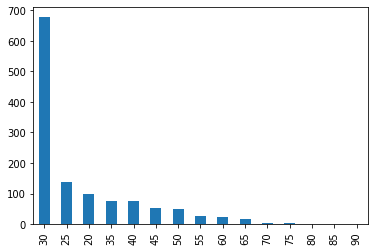

In [76]:
def add_age_group(dataframe):
    dataframe["age_group"] = pd.cut(
        dataframe["Age"],
        bins=[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
        labels=["20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90"])
    return dataframe

def bar_chart_age_group(dataframe):
    dataframe["age_group"].value_counts().plot(kind="bar")
    plt.show()

bar_chart_age_group(add_age_group(df))


# Task 4.2

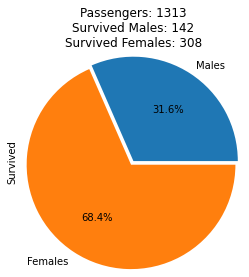

In [77]:
def pie_chart(dataframe):
    # get size of dataframe
    total_males = 0
    total_females = 0
    survived_males = 0
    survived_females = 0

    size = len(dataframe)
    for index, row in dataframe.iterrows():
        if row["GenderCode"] == 1:
            total_females += 1
        else:
            total_males += 1
        if row["Survived"] == 1:
            if row["GenderCode"] == 1:
                survived_females += 1
            else:
                survived_males += 1
    total_survived = survived_males + survived_females
    survived_males_percentage = (survived_males / total_survived) * 100
    survived_females_percentage = (survived_females / total_survived) * 100
    values = np.array([survived_males_percentage, survived_females_percentage])
    labels = ["Males", "Females"]

    plt.pie(x=values, labels=labels, radius=1.2, explode=(0, 0.05), autopct='%1.1f%%')
    plt.ylabel("Survived")
    plt.title(f"Passengers: {size}\n"
              f"Survived Males: {survived_males}\n"
              f"Survived Females: {survived_females}")

    plt.show()


pie_chart(df)